<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Brands_Reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing dataset for analysis
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-03-17 23:59:34,The only way #COVID19 can mutate with variants...,way mutate variants virus replicate hosts peop...,kemsunde,Unknown,"['COVID19', 'CovidVaccine', 'GetTheFactsGetThe...",Unknown
1,2021-03-17 23:59:20,I've now officially had my 1st dose of the #Co...,ive officially dose covidvaccine definitely wo...,ManeckiN,The Wild Western Wastes,"['CovidVaccine', 'COVID19', 'PfizerVaccine', '...",Unknown
2,2021-03-17 23:58:31,@hendopolis Imagine if the #Brexit referendum ...,hendopolis imagine brexit referendum held secr...,raymasseytweets,England,"['Brexit', 'EU', 'TrueColours', 'Impfstoff', '...",United Kingdom
3,2021-03-17 23:58:03,@EICostheta @RicBarraArch1 @insiders Yep. The ...,eicostheta insiders yep liarsnparasites narrow...,MikeFitzAU,Mudjimba,"['LiarsNParasites', 'CovidVaccine']",Australia
4,2021-03-17 23:57:37,This sounds like an important topic for @NickS...,sounds like important topic nicksawyermd tnich...,stephjantzen,Greater Sacramento,"['FiresideChat', 'CovidVaccine']",Brazil
...,...,...,...,...,...,...,...
352017,2021-04-03 18:39:22,RT @citymississauga: #COVID19Vaccine Booking T...,rt citymississauga booking tip wondering frien...,AnwarKnight,Toronto,['COVID19Vaccine'],Canada
352018,2021-04-03 18:39:13,RT @iamwandasykes: We’re fully vaccinated and ...,rt iamwandasykes fully vaccinated rejuvenated ...,HarrisTryonLab,Dallas,[],United States
352019,2021-04-03 18:39:04,#CovidVaccine and Weird Thoughts by Diane Burt...,covidvaccine weird thoughts diane burton https...,dla1950,http://,['CovidVaccine'],Japan
352020,2021-04-03 18:38:54,RT @ProfPatOConnor: It’s nice to know that the...,rt profpatoconnor nice know ambitions ceo hse ...,Pepeb72,Cork,[],Ireland


In [ ]:
# Shaping data and dropping nulls
df.shape
dataset = df.dropna()
dataset.shape

(352010, 7)

In [ ]:
# Manually declaring the reaction key words in a dictionary format by mapping with multiple values for single keys

reactionsAndItsKeywords = {'Fever' : ['fever'],
                           'Chills': ['chills'],
                           'Headache' : ['headache'],
                           'Neck pain' : ['neck pain'],
                           'Cold' : ['cold', 'flu'],
                           'Body pains' : ['body pain','body pains'],
                           'Sore arm' : ['sore arm','arm soreness','arm sore','swollen','injection area','tender arm'],
                           'Cough' : ['cough','coughing','sore throat'],
                           'Vomiting' : ['vomiting','throw up', 'nausea']}

# Function to check reactions with respect to each brand
def getReactions(brand, reactionVsItsCount):
  # passing the reaction through tweets to check the respective brand
  for tweet in df["CleanedTweet"]:
    try:
      if tweet.find(brand) != -1:  # Check if brand exist in tweet
        for reaction, keywords in reactionsAndItsKeywords.items(): # Iterate through each tweet when brand exist to check if any reactions from 
                                                                   # From the map exists
          for keyword in keywords:
            if(keyword in tweet):
              if reaction not in reactionVsItsCount.keys():        # If both brand and reactions exist creating dictionary mapping multiple reactions for each brand
                reactionVsItsCount[reaction] = 1
              else:
                  reactionVsItsCount[reaction] = reactionVsItsCount[reaction]+1

    except Exception as ex:
      pass
  return reactionVsItsCount
                            

In [ ]:
# Manually declaring vaccine brands by identifying the existing one from the tweets processed data
vaccinesAndItsKeyWords = {"Covaxin":['covax','vax','behalf_covax','covaxin','covaxsd','covaxinrockstheworld','covaxvaccinations','covaxinreiterated'],
                          "Pfizer":['pfizercovidvaccine','pfizervaccine','pfizer','modernapfizer','biotech','pfizerbiotech','pfizerbiontech'],
                          "Moderna" : ['moderna','modernavaccine','teammoderna','modernagang','modernas'],
                          "Johnson&Johnson" : ['borisjohnson','johnsonandjohnson',
                                               'johnsonandjohnsonvaccine','johnsonjohnson',
                                               'johnsonampjohnson','johnsonjohnsonvax','johnsonand','johnson','janssenglobal','janssenvaccine','janssen','janssenus'],
                          "Covishield" :['covishield','covishieldvaccine','covishielded'],
                          "Astrazeneca" : ['astrazeneca','oxford','breakingastrazeneca','oxfordastrazeneca','astrazenecas',
                                            'astrazenecavaccine','astrazenecaoxford','astrazenecauk'],
                          "Sputnik" : ['sputnikint','sputnik','sputnikvaccine','sputnikv','sputnikvaccineke',
                                        'sputnikvaccineinkenya','sputnikvaccinekenya']
                          }               

reactions=[]
brandVsReactions= {}

for vaccine, keywords  in vaccinesAndItsKeyWords.items():
  reactionsVsCount={}
  for keyword in keywords:
    try:
        reactionsVsCount = getReactions(keyword,reactionsVsCount) # Function to check reactions for each barnd passed
    except:
        print ("Error while checking brand")
  brandVsReactions[vaccine] = reactionsVsCount

print(brandVsReactions)

{'Covaxin': {'Cold': 57, 'Fever': 21, 'Chills': 13, 'Headache': 12, 'Body pains': 7, 'Sore arm': 22, 'Cough': 4, 'Vomiting': 3}, 'Pfizer': {'Cold': 149, 'Headache': 217, 'Fever': 167, 'Chills': 112, 'Sore arm': 361, 'Vomiting': 46, 'Cough': 24, 'Neck pain': 1, 'Body pains': 1}, 'Moderna': {'Sore arm': 196, 'Headache': 187, 'Fever': 132, 'Chills': 100, 'Vomiting': 30, 'Cold': 107, 'Cough': 2}, 'Johnson&Johnson': {'Cold': 88, 'Headache': 102, 'Chills': 73, 'Sore arm': 62, 'Fever': 87, 'Vomiting': 17, 'Cough': 23}, 'Covishield': {'Fever': 25, 'Chills': 1, 'Headache': 1, 'Body pains': 5, 'Cough': 8, 'Vomiting': 1, 'Cold': 1}, 'Astrazeneca': {'Cold': 106, 'Sore arm': 66, 'Cough': 10, 'Headache': 125, 'Fever': 64, 'Vomiting': 14, 'Chills': 35, 'Body pains': 10}, 'Sputnik': {'Cold': 22, 'Sore arm': 6}}


In [ ]:
# Creating a data frame
df = pd.DataFrame(brandVsReactions, index=['Covaxin', 'Pfizer', 'Moderna','Johnson&Johnson','Covishield','Astrazeneca','Sputnik'])

In [ ]:
# Dropping Nan if exist
df= pd.DataFrame.from_dict(brandVsReactions)
df.fillna(0, inplace=True)
df

,Covaxin,Pfizer,Moderna,Johnson&Johnson,Covishield,Astrazeneca,Sputnik
Cold,57.0,149,107.0,88.0,1.0,106.0,22.0
Fever,21.0,167,132.0,87.0,25.0,64.0,0.0
Chills,13.0,112,100.0,73.0,1.0,35.0,0.0
Headache,12.0,217,187.0,102.0,1.0,125.0,0.0
Body pains,7.0,1,0.0,0.0,5.0,10.0,0.0
Sore arm,22.0,361,196.0,62.0,0.0,66.0,6.0
Cough,4.0,24,2.0,23.0,8.0,10.0,0.0
Vomiting,3.0,46,30.0,17.0,1.0,14.0,0.0
Neck pain,0.0,1,0.0,0.0,0.0,0.0,0.0


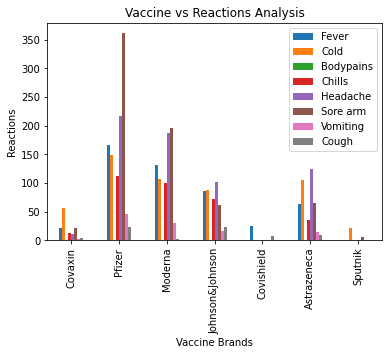

In [ ]:
# Visualising the data set through bar chart
from matplotlib import pyplot as plt

plotdata = pd.DataFrame({
    "Covaxin":df['Covaxin'],
    "Pfizer": df['Pfizer'],
    "Moderna": df['Moderna'],
    "Johnson&Johnson": df['Johnson&Johnson'],
    "Covishield": df['Covishield'],
    "Astrazeneca" : df['Astrazeneca'],
    "Sputnik" : df['Sputnik']
    }, 
    index=["Fever", "Cold", "Bodypains", "Chills", "Headache","Sore arm","Vomiting","Cough"]
)
plotdata.transpose().plot(kind="bar")
plt.title("Vaccine vs Reactions Analysis")
plt.xlabel("Vaccine Brands")
plt.ylabel("Reactions")
plt.savefig('BrandsVsReactions.png')